## Adding "levels" to a Tree

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


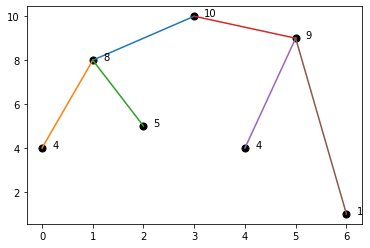

In [11]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt


from interleaving_FPT import *
import binarytrees as bt


# Build tree
root = bt.TreeNode(key=10)
root.left = bt.TreeNode(key=8)
root.left.left = bt.TreeNode(key=4)
root.left.right = bt.TreeNode(key=5)
root.right = bt.TreeNode(key=9)
root.right.left = bt.TreeNode(key=4)
root.right.right = bt.TreeNode(key=1)

tree1 = bt.BinaryTree()
tree1.root = root

# Visualize
tree1.draw()



We now call `get_criticalheights()` on the tree to add tree nodes at each level (as dubbed in the paper), i.e., along the "horitzonal lines."


{4: [<binarytrees.TreeNode object at 0x11248a860>, <binarytrees.TreeNode object at 0x11248ad10>, <binarytrees.TreeNode object at 0x1124936a0>], 5: [<binarytrees.TreeNode object at 0x11240b5e0>, <binarytrees.TreeNode object at 0x11248ac50>, <binarytrees.TreeNode object at 0x1123cffa0>, <binarytrees.TreeNode object at 0x1122c5810>], 8: [<binarytrees.TreeNode object at 0x11248a680>, <binarytrees.TreeNode object at 0x112493340>, <binarytrees.TreeNode object at 0x112493430>], 9: [<binarytrees.TreeNode object at 0x1122c6f80>, <binarytrees.TreeNode object at 0x11248acb0>], 10: [<binarytrees.TreeNode object at 0x11240a620>], 1: [<binarytrees.TreeNode object at 0x11248ad70>]}


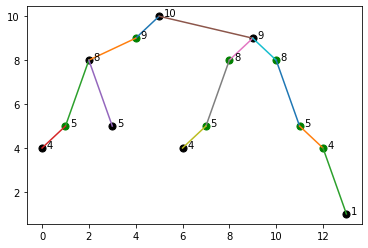

In [12]:
heights = get_criticalheights(tree1)
print(heights)

tree1.draw()

We now build a second tree:

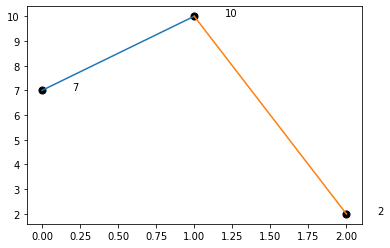

In [13]:
root2 = bt.TreeNode(key=10)
root2.left = bt.TreeNode(key=7)
root2.right = bt.TreeNode(key=2)

tree2 = bt.BinaryTree()
tree2.root = root2

tree2.draw()


Finally, we can perform the full augmentation, adding all nodes from the "super levels" of both trees:

In [14]:
tree1 == tree2

False

In [15]:
print(get_criticalheights(tree2))

{7: [<binarytrees.TreeNode object at 0x1120c76a0>, <binarytrees.TreeNode object at 0x1125810f0>], 10: [<binarytrees.TreeNode object at 0x1124f8340>], 2: [<binarytrees.TreeNode object at 0x1124fabc0>]}


In [16]:
print(get_criticalheights(tree1) == get_criticalheights(tree2))

False


From Tree 1 node(s) at height 4 adding super level at height 4.3 to Tree 2.
From Tree 1 node(s) at height 5 adding super level at height 5.3 to Tree 2.
From Tree 1 node(s) at height 8 adding super level at height 8.3 to Tree 2.
From Tree 1 node(s) at height 9 adding super level at height 9.3 to Tree 2.
From Tree 1 node(s) at height 10 adding super level at height 10.3 to Tree 2.
From Tree 1 node(s) at height 1 adding super level at height 1.3 to Tree 2.
From Tree 2 node(s) at height 7 adding super level at height 6.7 to Tree 1.
From Tree 2 node(s) at height 10 adding super level at height 9.7 to Tree 1.
From Tree 2 node(s) at height 2 adding super level at height 1.7 to Tree 1.


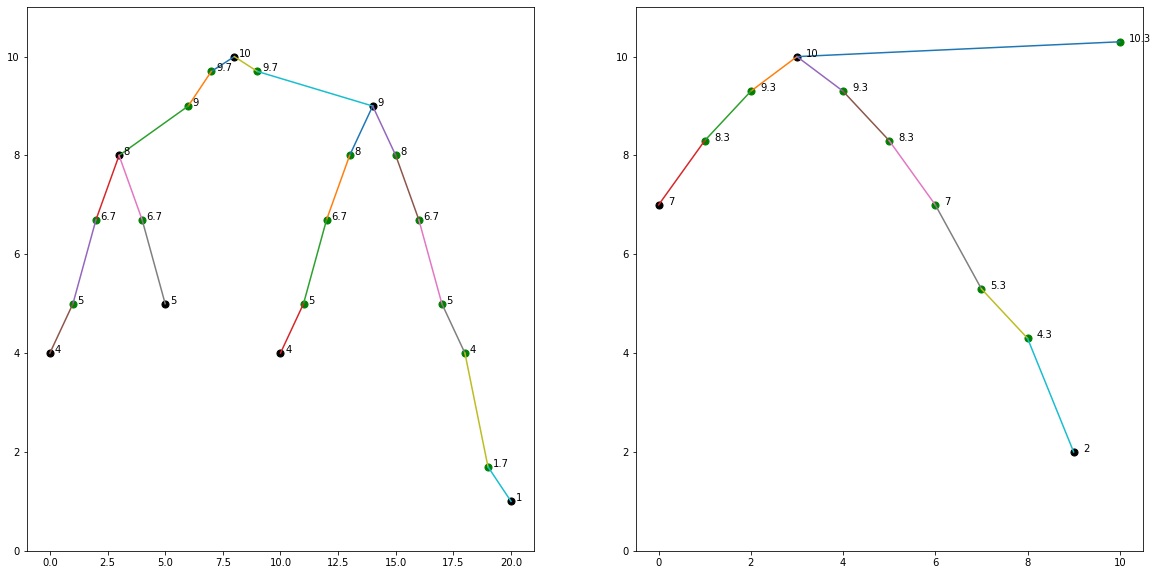

In [17]:
augment_trees(tree1, tree2, delta=0.3)

plt.figure(figsize=(20,10))

plt.subplot(121)
plt.ylim((0,11))
tree1.draw()

plt.subplot(122)
plt.ylim((0,11))
tree2.draw()

In [18]:
tree3 = bt.BinaryTree()
tree3.root = bt.TreeNode(key=11)

print(get_criticalheights(tree3))

{11: [<binarytrees.TreeNode object at 0x1126689a0>]}


We now make dictionaries to get a correspondence between heights and super levels:

In [19]:
superlevels_T1 = get_nodeheights(tree1.root, nodeheights={})
print(superlevels_T1.keys())

superlevels_T2 = get_nodeheights(tree2.root, nodeheights={})
print(superlevels_T2.keys())

dict_keys([4, 5, 6.7, 8, 9, 9.7, 10, 1.7, 1])
dict_keys([7, 8.3, 9.3, 10, 5.3, 4.3, 2, 10.3])


Now we simply sort the keys of the dictionaries in separate arrays to have an easy way to access the super levels in order:

In [20]:
superlevels_T1_sorted_keys = sorted(superlevels_T1.keys())
print(superlevels_T1_sorted_keys)

superlevels_T2_sorted_keys = sorted(superlevels_T2.keys())
print(superlevels_T2_sorted_keys)


[1, 1.7, 4, 5, 6.7, 8, 9, 9.7, 10]
[2, 4.3, 5.3, 7, 8.3, 9.3, 10, 10.3]
